# Analisis y visualizacion de datos

**Integrantes**: Nehuén Vivar Libossart

Se va a trabajar con la encuesta de salarios de Sysarmy
**Openqube**, es una plataforma colaborativa en la que empleados y ex empleados brindan información de claidad sobre las empresas IT, desde 2014 lleva a cabo encuestas salariales dentro de la comunidad tecnológica y publica los resultados en el blog de **Sysarmy**.
Sysarmy, es la comunidad de sistemas que nuclea a profesionales del área ara favorecer el contacto y el intercambio de conocimeinto de manera informal.

Nos enfocaremos en trabajar con la encuesta del primer trimestre de 2025 encontrada en el siguiente [enlace](https://https://docs.google.com/spreadsheets/d/1Vq9F6xE03fR0x6pXlRMDN_bww7NWItjMW0U89qV3AvM/edit?gid=1462536742#gid=1462536742).
Nuestro trabajo coniste en realizar un análisis de datos en base a los resultados de la encuesta.
En este trabajo de simulación, nos enfocaremos en responder las siguientes preguntas:

-¿Cuál es el máximo nivel estudiantil alcanzado?

-¿Qué carreras son más estudidadas?

-¿Cuales son los lenguajes de programación o tecnolo´gias más utilizadas?

-¿Qué herramientas de ia son más utilizadas?

-¿Hay más part time o full time?¿Cuál es la diferencia de salario bruto por categoría?

-¿Hay diferencia de salario en bruto por genero?

# Encuesta de salarios del primer trimestre de 2025



Durante todo este notebook se trabajara con la libreria pandas, que contiene funciones y herramientas útiles para trabajar con datasets en Python. Se usara la librería seaborn para los gráficos estadísticos y el módulo stats de la libreria scipy para cuando trabajamos con el coqueteo inferencial.




In [ ]:
import io
import pandas as pd
import csv

pd.set_option('display.max_rows', 10)

import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import numpy as np
import chardet
from scipy import stats
from collections import Counter
from google.colab import files

# Carga de datos

Cargaremos los datos del archivo Sysarmy 2025 del primer trimestre (pudiendo ser descargado por [acá](https://https://docs.google.com/spreadsheets/d/1Vq9F6xE03fR0x6pXlRMDN_bww7NWItjMW0U89qV3AvM/edit?gid=1462536742#gid=1462536742)) con la siguiente instrucción.

In [ ]:
from google.colab import files
uploaded = files.upload()
fname=list(uploaded.keys())[0]

Saving 2025.1 - Sysarmy - Encuesta de remuneración salarial Argentina - Sysarmy - sueldos - 2025.01CLEAN.csv to 2025.1 - Sysarmy - Encuesta de remuneración salarial Argentina - Sysarmy - sueldos - 2025.01CLEAN.csv


# ***TABLA***

Hubieron complicaciones con la base de datos Sysarmy 2025 primer trimestre se tuvo que analizar y hacer modificaciones para poder leerla, entre los problemas hallados:

-No era posible subirla.

-No era posible el leer los datos.

Entre otros problemas, caso particular de la base de datos 2025 ya que se probo con otras bases de datos y no habian estos problemas.

Por ese motivo se debio utilizar el siguiente código.

In [ ]:
def detect_encoding(file_bytes, sample=10000):
    return chardet.detect(file_bytes[:sample])['encoding']
uploaded_bytes = uploaded[fname]
enc = detect_encoding(uploaded_bytes)

#Leer sin header para inspeccionar las primeras filas (mantener todo como str)
df_raw = pd.read_csv(io.BytesIO(uploaded_bytes),
                     encoding=enc,
                     engine='python',
                     dtype=str,
                     sep=',',
                     header=None,
                     skiprows=6)

#Detectar si las primeras 2-3 filas son encabezados repetidos
header_row_idx = 3 # La fila con los nombres de las columnas reales
drop_until = 4     # Las filas de datos comienzan una fila después del encabezado

#Asignar nombres de columnas y eliminar filas de encabezado repetidas
new_columns = df_raw.iloc[header_row_idx].astype(str).str.strip().tolist()
#Asegurar que el primer nombre de columna no sea 'nan' si estaba vacío en el CSV
if new_columns[0] == 'nan' or new_columns[0] == '':
    new_columns[0] = 'id' # Asignar un nombre genérico si la primera columna no tiene uno

df = df_raw.iloc[drop_until:].copy()
df.columns = new_columns

#Normalizar: limpiar NBSP, espacios y convertir strings vacíos a pd.NA (usar map para evitar FutureWarning)
def clean_cell(x):
    if pd.isna(x):
        return pd.NA
    s = str(x).strip().replace('\xa0', ' ')
    if s == '' or s.lower() in ('nan', 'none'):
        return pd.NA
    return s

df = df.map(clean_cell)

#Propagar valores si corresponde
df_ffill = df.ffill(axis=0).bfill(axis=0)

#Función para parsear columnas numéricas (igual que la tuya)
def parse_num_col(s):
    if pd.isna(s):
        return pd.NA
    s = str(s)
    s = s.replace('$', '').replace('ARS', '').replace(' ', '').replace('\xa0', '')
    if s.count(',') == 1 and s.count('.') > 0:
        s = s.replace('.', '').replace(',', '.')
    s = s.replace(',', '')
    try:
        return pd.to_numeric(s, errors='coerce')
    except Exception:
        return pd.NA

num_cols = [
    'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos',
    'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos',
    'tengo_edad'
]
for c in num_cols:
    if c in df_ffill.columns:
        df_ffill[c + '_numeric'] = df_ffill[c].apply(parse_num_col)

#Resultado
df = df_ffill.copy()
display(df.head(20))
print("Columnas detectadas:", df.columns.tolist())

,id,donde_estas_trabajando,dedicacion,tipo_de_contrato,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos,pagos_en_dolares,si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron,recibis_algun_tipo_de_bono,a_que_esta_atado_el_bono,...,aclara_el_numero_que_ingresaste_en_el_campo_anterior,tengo_edad,genero,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos_numeric,tengo_edad_numeric
4,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000,5800000,Cobro parte del salario en dólares,985,De uno a tres sueldos,Performance de la compañía,...,Bruto,45,Hombre Cis,Sí,TRUE,Senior,6500000,6500000.00,5800000.00,45
5,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000,10200000,Cobro todo el salario en dólares,985,Un sueldo,Performance de la compañía,...,Bruto,32,Mujer Cis,Sí,TRUE,Senior,12700000,12700000.00,10200000.00,32
6,2,Córdoba,Full-Time,Staff (planta permanente),3952805,3137662,Cobro parte del salario en dólares,985,No,No recibo bono,...,Bruto,29,Hombre Cis,Sí,TRUE,Semi-Senior,3952805,3952805.00,3137662.00,29
7,3,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),1606000,1360000,Cobro parte del salario en dólares,1004,No,No recibo bono,...,Bruto,25,Hombre Cis,Sí,TRUE,Semi-Senior,1606000,1606000.00,1360000.00,25
8,4,Córdoba,Full-Time,Tercerizado (trabajo a través de consultora o ...,1325301,1360000,Cobro parte del salario en dólares,1004,No,No recibo bono,...,Bruto,22,Hombre Cis,Sí,TRUE,Senior,1325301,1325301.00,1360000.00,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,15,Buenos Aires,Full-Time,Staff (planta permanente),3300000,2662651,Cobro todo el salario en dólares,1080,Menos de un sueldo,Performance individual,...,Bruto,37,Hombre Cis,No,TRUE,Senior,3300000,3300000.00,2662651.00,37
20,16,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,2303066,1911545,Cobro parte del salario en dólares,990.14,No,No recibo bono,...,Neto,35,Hombre Cis,Sí,TRUE,Senior,2303066,2303066.00,1911545.00,35
21,18,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),1392320.53,1255181.47,Cobro parte del salario en dólares,1023,Menos de un sueldo,Mix de las anteriores,...,Porcentaje de mi sueldo bruto,28,Mujer Cis,No,TRUE,Junior,1392320.53,1392320.53,1255181.47,28
22,19,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,6226000,6026000,Cobro todo el salario en dólares,1023,No,No recibo bono,...,Porcentaje de mi sueldo bruto,51,Hombre Cis,Sí,TRUE,Senior,6226000,6226000.00,6026000.00,51


Columnas detectadas: ['id', 'donde_estas_trabajando', 'dedicacion', 'tipo_de_contrato', 'ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos', 'ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos', 'pagos_en_dolares', 'si_tu_sueldo_esta_dolarizado_cual_fue_el_ultimo_valor_del_dolar_que_tomaron', 'recibis_algun_tipo_de_bono', 'a_que_esta_atado_el_bono', 'tuviste_actualizaciones_de_tus_ingresos_laborales_durante_2024', 'de_que_fue_el_ajuste_total_acumulado', 'en_que_mes_fue_el_ultimo_ajuste', 'como_consideras_que_estan_tus_ingresos_laborales_comparados_con_el_semestre_anterior', 'contas_con_beneficios_adicionales', 'que_tan_conforme_estas_con_tus_ingresos_laborales', 'estas_buscando_trabajo', 'pluriempleo', 'trabajo_de', 'anos_de_experiencia', 'antiguedad_en_la_empresa_actual', 'anos_en_el_puesto_actual', 'cuantas_personas_tenes_a_cargo', 'plataformas_que_utilizas_en_tu_puesto_actual', 'lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual', 'frameworksherra

Cada **fila** es un registro, quiere decir una respuesta a la encuesta.

Cada **columna** es una variable. Algunas siendo categorias (como genero, sueldo, dedicacion, etc) que usaremos para poder hacer los análisis al extraerlo de la tabla.

In [ ]:
df.describe()

,ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric,ultimo_salario_mensual_o_retiro_neto_en_pesos_argentinos_numeric,tengo_edad_numeric
count,5.196000e+03,5.196000e+03,5196.000000
mean,2.728423e+06,1.021989e+10,36.573133
std,1.780241e+06,7.365092e+11,45.322732
min,1.500000e+05,4.000000e+00,19.000000
25%,1.500000e+06,1.283979e+06,29.000000
50%,2.290000e+06,1.930000e+06,35.000000
75%,3.500000e+06,2.900000e+06,41.000000
max,1.350000e+07,5.309001e+13,3040.000000


Con *describe* veremos una extracción de alguno de los datos más importantes, siendo en este caso los de ultimo salario en **bruto** y el **neto**

# **Genero**

Analizaremos entre los encuestados el genero de los mismos para poder tenerlo en cuenta en un análisis posterior.

Primero traeremos todos los generos en la tabla de generos

In [ ]:
gender_counts = df ['genero'].value_counts()
gender_counts

,count
genero,
Hombre Cis,4085
Mujer Cis,1027
Prefiero no decir,44
No binarie,26
Queer,8
Trans,4
Lesbiana,1
Agénero,1


Como algunos son muy pocos los filtraremos en pos de un análisis mejor y dejaremos los más notables, disponiendo de un umbral que existan más de diez para poder aparecer en la encuesta.

In [ ]:
#Filtrado de genero que tiene una ocurrencia meo o igual al  umbral
umbral = 10

generos_menos_frecuentes = df['genero'].value_counts()[df['genero'].value_counts()<umbral].index
#Filtrado de dataset
df_filtrado_genero = df[~df['genero'].isin(generos_menos_frecuentes)]

Una vez filtrado volveremos a traer la lista de los datos que han quedado para una posterior revisión de los mismos y comprobación de que esten pasando el umbral.

In [ ]:
gender_counts = df_filtrado_genero['genero'].value_counts()
gender_counts

,count
genero,
Hombre Cis,4085
Mujer Cis,1027
Prefiero no decir,44
No binarie,26


Una vez ya filtrado y comprobado, podremos poder analizarlos mediante una grafica correspondiente.

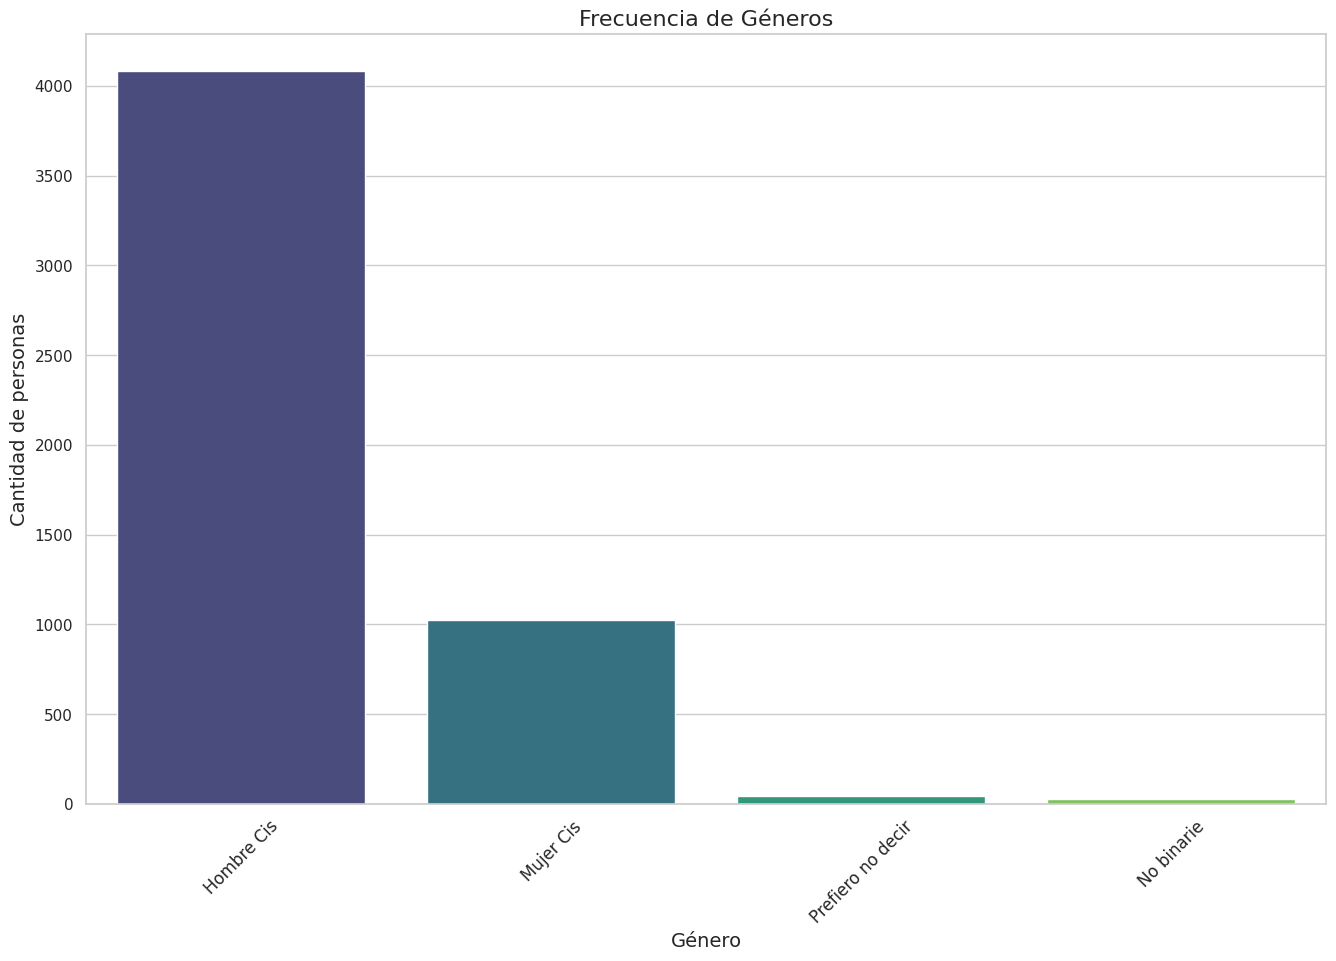

In [ ]:
# Configurar colores y estilo
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=gender_counts.reset_index()
frecuencias_df.columns=['genero','frecuencia']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='genero',y='frecuencia',
            palette="viridis", #Esquema de colores
            hue='genero', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )
# Etiquetas
plt.title("Frecuencia de Géneros", fontsize=16)
plt.xlabel("Género", fontsize=14)
plt.ylabel("Cantidad de personas", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

 Como podemos observar en el gráfico podemos observar las personas por genero que han sido encuestadas, en el eje X del mismo podemos observar cada genero y en el eje Y podemos observar las personas.

 Como dato notable podemos notar que la gran mayoria de los encuestados son hombres Cis.

# **Seniority**

En este caso nos enfocaremos en el apartado de la cantidad de personas y de que nivel de seniority son quienes han realizado la encuesta.

Esto es importante por que eso implicaria las diferencias amplias entre difernetes categorias importantes como lo es la del sueldo bruto.

Para empezar vamos a contar cuantas personas hay en cada categoría del seniority.

In [ ]:
seniority_counts = df['seniority'].value_counts()
seniority_counts

,count
seniority,
Senior,2648
Semi-Senior,1634
Junior,914


Una vez contadas las personas por cada categoría de cada seniority procederemos a hacer un gráfico para el análisis correspondiente.

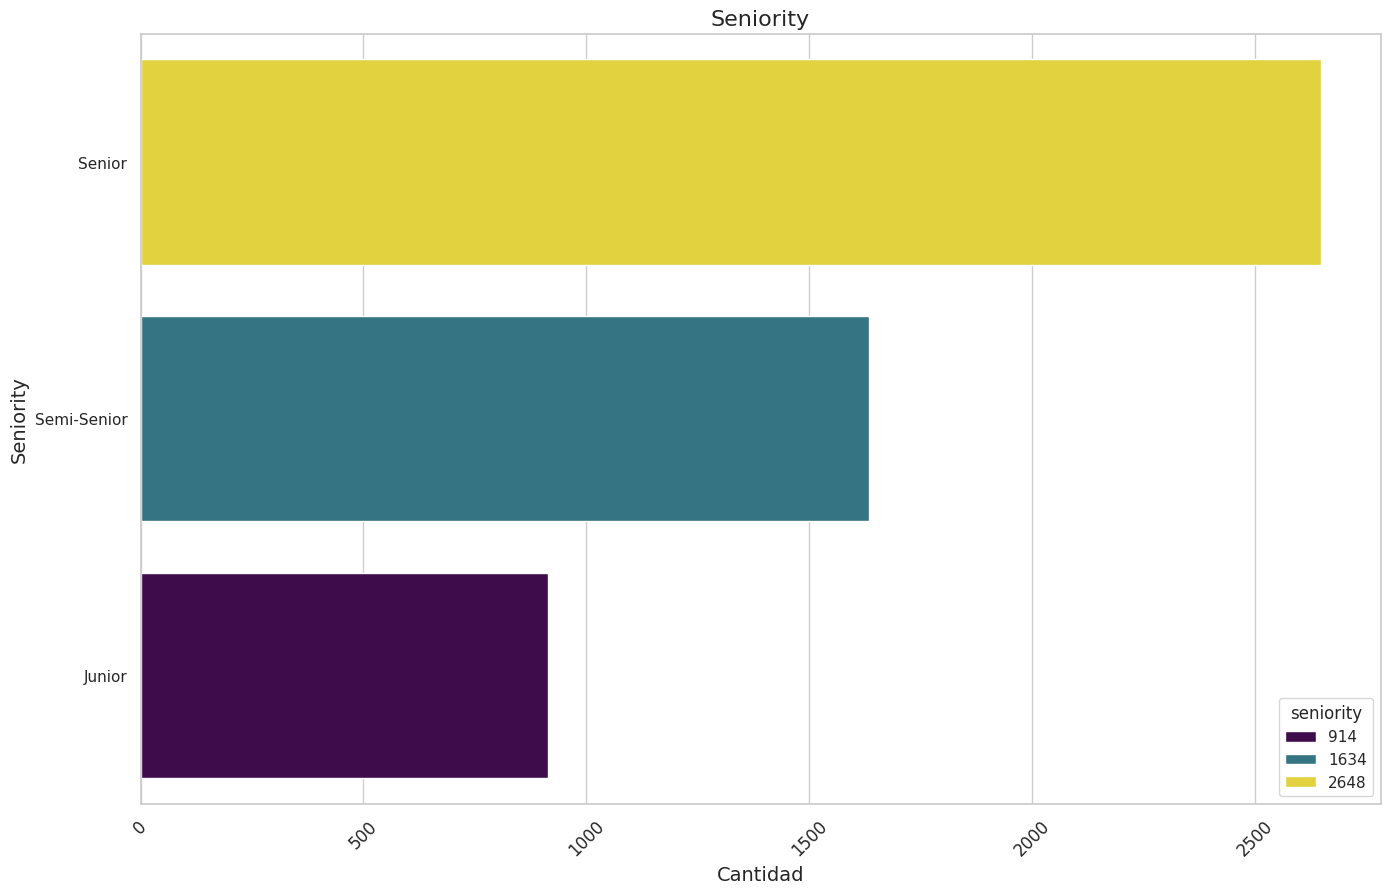

In [ ]:
#Config
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

frecuencias_df=seniority_counts.reset_index()
frecuencias_df.columns=['seniority_counts','seniority']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='seniority',y='seniority_counts',
            palette="viridis", #Esquema de colores
            hue='seniority', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )

plt.title("Seniority", fontsize=16)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Seniority", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.show()

En el correspondiente gráfico, podemos ver la cantidad de personas que hay en cada categoria de seniority, en donde en el eje x seria la cantidad y en el eje y podemos ver cada categoria representada.

Podemos ver que hay una gran cantidad de seniors que realizaron la encuesta.

# **Edad**

En está parte priorizaremos el rango de edades que hay entre los encuestados. Para este caso no llamamos primero la columna de la tabla de edades ni la filtramos previamente ya que lo haremos en la creación del gráfico al mismo tiempo teniendo en este caso un rango de hasta 80 aunque se espera que los encuestados lleguen a menor edades.

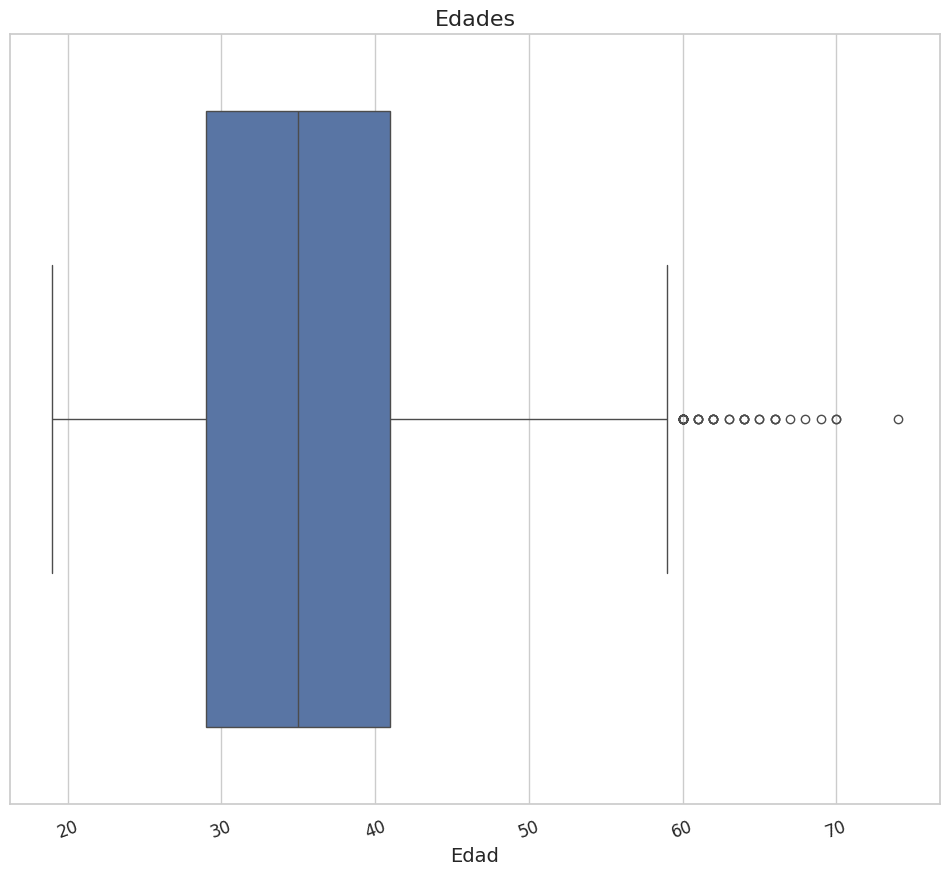

In [ ]:
plt.figure(figsize=(12,10))

sns.boxplot(
    x=df[df.tengo_edad_numeric < 80].tengo_edad_numeric
    )

plt.title("Edades",fontsize=16)
plt.xlabel("Edad",fontsize=14)
plt.xticks(rotation=20,fontsize=12)
plt.show()

Como vemos en este gráfico representado en el eje x las edades podemos atribuirle un mayor rango entre los ~28 hasta los ~43.

Aunque este tipo de graficos es bueno para los rangos, el siguiente nos permitira ver más ampliamente cuantos encuestados tienen que edad.

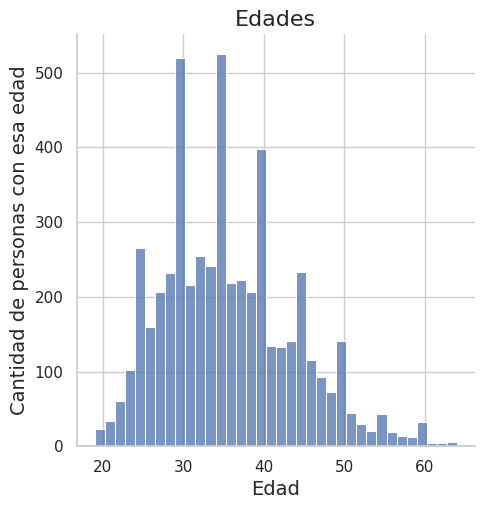

In [ ]:
# Gráfico de distribución de la variable edad

# Crear grafico
sns.displot(
    df[df.tengo_edad_numeric < 65].tengo_edad_numeric
)

# Etiquetas
plt.title("Edades", fontsize=16)
plt.xlabel("Edad", fontsize=14)
plt.ylabel("Cantidad de personas con esa edad", fontsize=14)
plt.show()

En este grafico podemos observar de una mejor forma que cantidad de personas tienen determinada edad, viendo una mayor proliferación de encuestados con 30 y 35 años, en comparación al gráfico anterior que nos mostraba un rango más amplio.

# **Edad por genero**

En este análisis podremos ver las concentraciones de edad en cada genero plasmado en los encuestados. Para este utilizaremos un tipo de grafico denominado "violin" debido a su visualización.

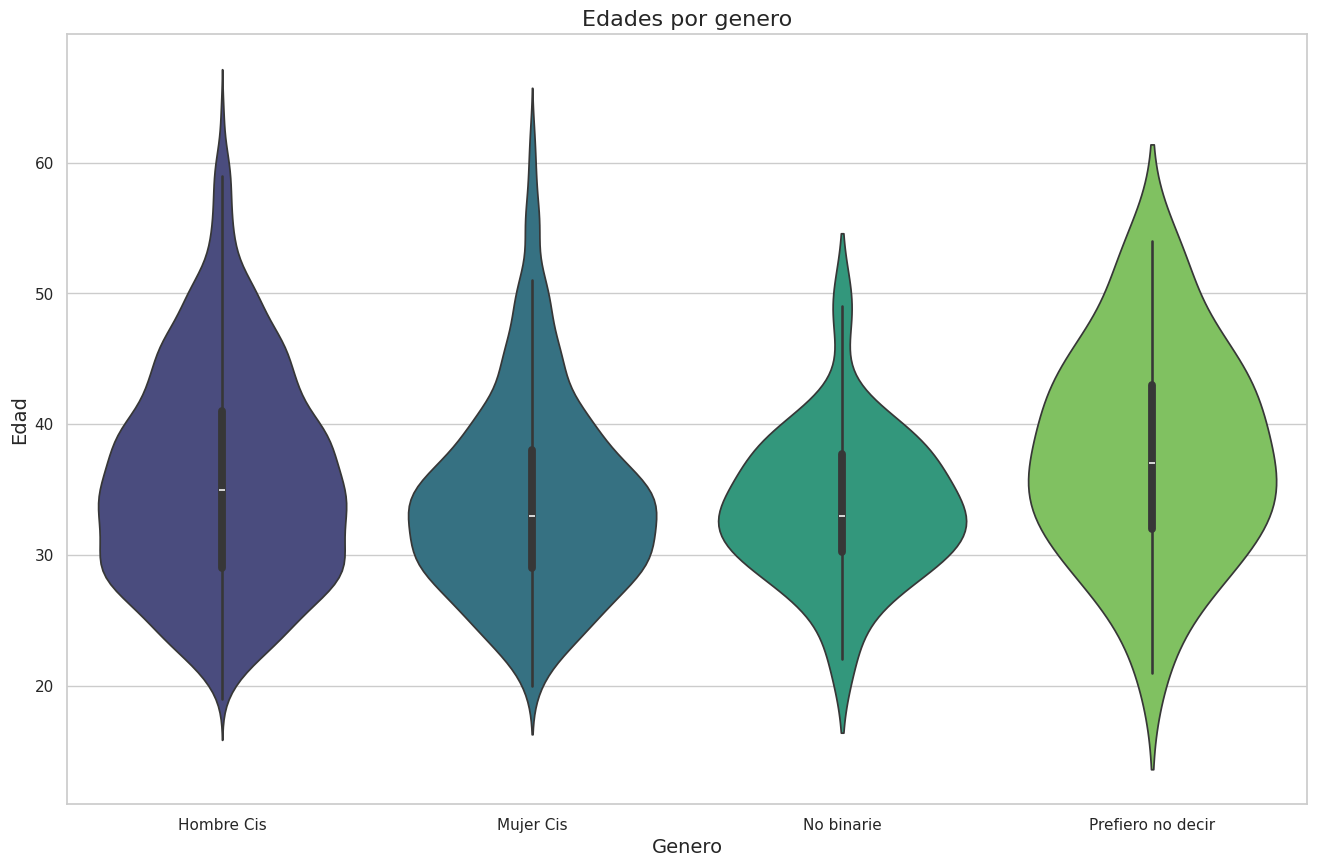

In [ ]:
df_filtrado_edad=df_filtrado_genero[df_filtrado_genero['tengo_edad_numeric']<65]

sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

sns.violinplot(x='genero',y='tengo_edad_numeric',data=df_filtrado_edad,
            palette="viridis", #Esquema de colores
            hue='genero', #Asignar colores por categoria
            )

plt.title("Edades por genero",fontsize=16)
plt.xlabel("Genero",fontsize=14)
plt.ylabel("Edad",fontsize=14)
plt.show()

Como podemos observar, el grafico de tipo violin en este caso nos permite tener en cuenta el rango de edades por cada genero de los encuestados. Sus anchuras son representantes de los encuestados de ese genero y de su proliferación de esa edad, como vimos representados en los anteriores análisis por separado.

# **Maximo nivel estudiantil alcanzado**

En este caso analizaremos que nivel estudiantil máximo alcanzaron los encuestados independientemente del estado en el que este el mismo.

In [ ]:
educativo_count=df['maximo_nivel_de_estudios'].value_counts()
educativo_count

,count
maximo_nivel_de_estudios,
Universitario,3461
Terciario,896
Posgrado/Especialización,325
Maestría,269
Secundario,175
Doctorado,45
Posdoctorado,25


Para el analisis del nivel de estudio, como sabremos habran distintos niveles por lo que primero deberemos de llamar la columna completa y separarla en cada caso que se ebcuentre.

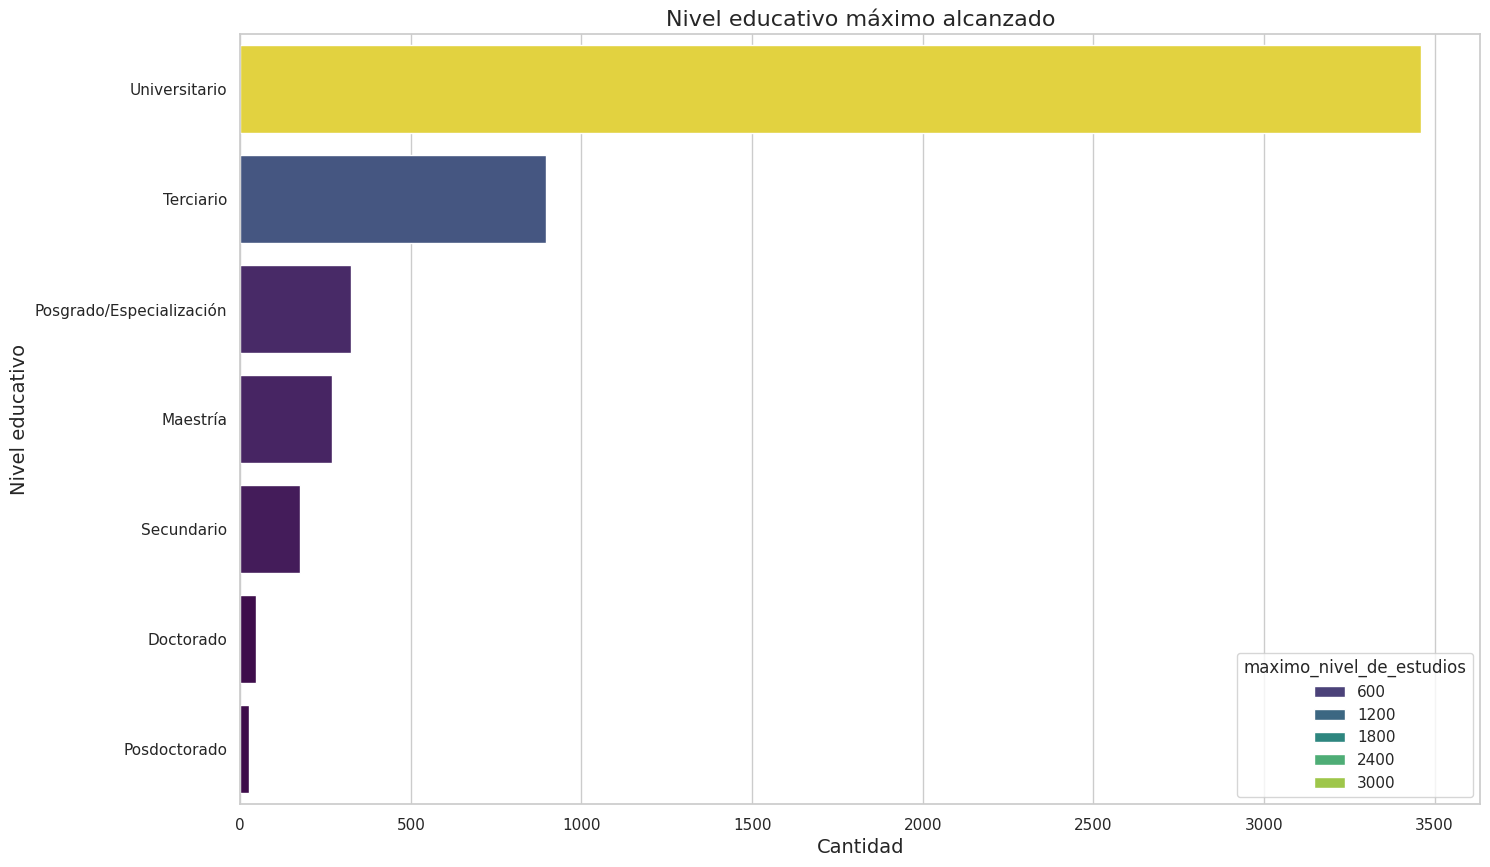

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=educativo_count.reset_index()
frecuencias_df.columns=['educativo_count','maximo_nivel_de_estudios']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='maximo_nivel_de_estudios',y='educativo_count',
            palette="viridis", #Esquema de colores
            hue='maximo_nivel_de_estudios', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )

# Etiquetas
plt.title("Nivel educativo máximo alcanzado", fontsize=16)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Nivel educativo", fontsize=14)
plt.show()

Una vez llamada la columna podremos establecer el grafico con el cuál haremos el análisis; en el mismo podemos ver que hay una gran proliferación de estudiantes (independientemente del estado en el que esten) de universitarios y seguidos por estudios terciarios.

# **Carrera estudiada**

Una vez analisados cuál es el máximo nivel estudiantil alcanzado podremos analisar cuáles son las carreras más estudiadas entre los encuestados, con probable enfoque en algo con IT por el enfoque de quienes son encuestados y sus trabajos.

In [ ]:
carrera_count=df['carrera'].value_counts()
carrera_count

,count
carrera,
Ingeniería en Sistemas,837
Ingeniería en Informática,544
Analista de Sistemas,482
Tecnicatura Superior en Programación,368
Licenciatura en Sistemas,312
...,...
"En Agilismo, Po, SM y especialidad en plataforma GW",1
MBA,1
Tecnicatura Universitaria en Redes Informaticas,1


Primero traeremos toda la columna de carrera, para poder revisar que carreras son estudidas, aunque al hacerlo notamos que tenemos algunas con muy pocos estudiantes.

In [ ]:
#Filtrado de genero que tiene una ocurrencia menor o igual al  umbral
umbral = 50

carrera_menos_frecuente = df['carrera'].value_counts()[df['carrera'].value_counts()<umbral].index
#Filtrado de dataset
df_filtrado_carrera = df[~df['carrera'].isin(carrera_menos_frecuente)]

Debido que algunas carreras disponen de pocos representantes (menos de 50) se opta por hacer un limite de aquellos estudiantes para un mejor análisis, dejando aquellas carreras que tendrán al menos más de 10 representantes.

El limite de este umbral podria ser aumentado o disminuido para un mejor análisis si fuera necesario.

In [ ]:
carrera_count = df_filtrado_carrera['carrera'].value_counts()
carrera_count

,count
carrera,
Ingeniería en Sistemas,837
Ingeniería en Informática,544
Analista de Sistemas,482
Tecnicatura Superior en Programación,368
Licenciatura en Sistemas,312
...,...
Analista Programador Universitario,92
Ingeniería Industrial,84
Tecnicatura en Informática,65


Una vez realizado el filtrado podremos observar que carreras disponen de mayor cantidad de estudiantes.

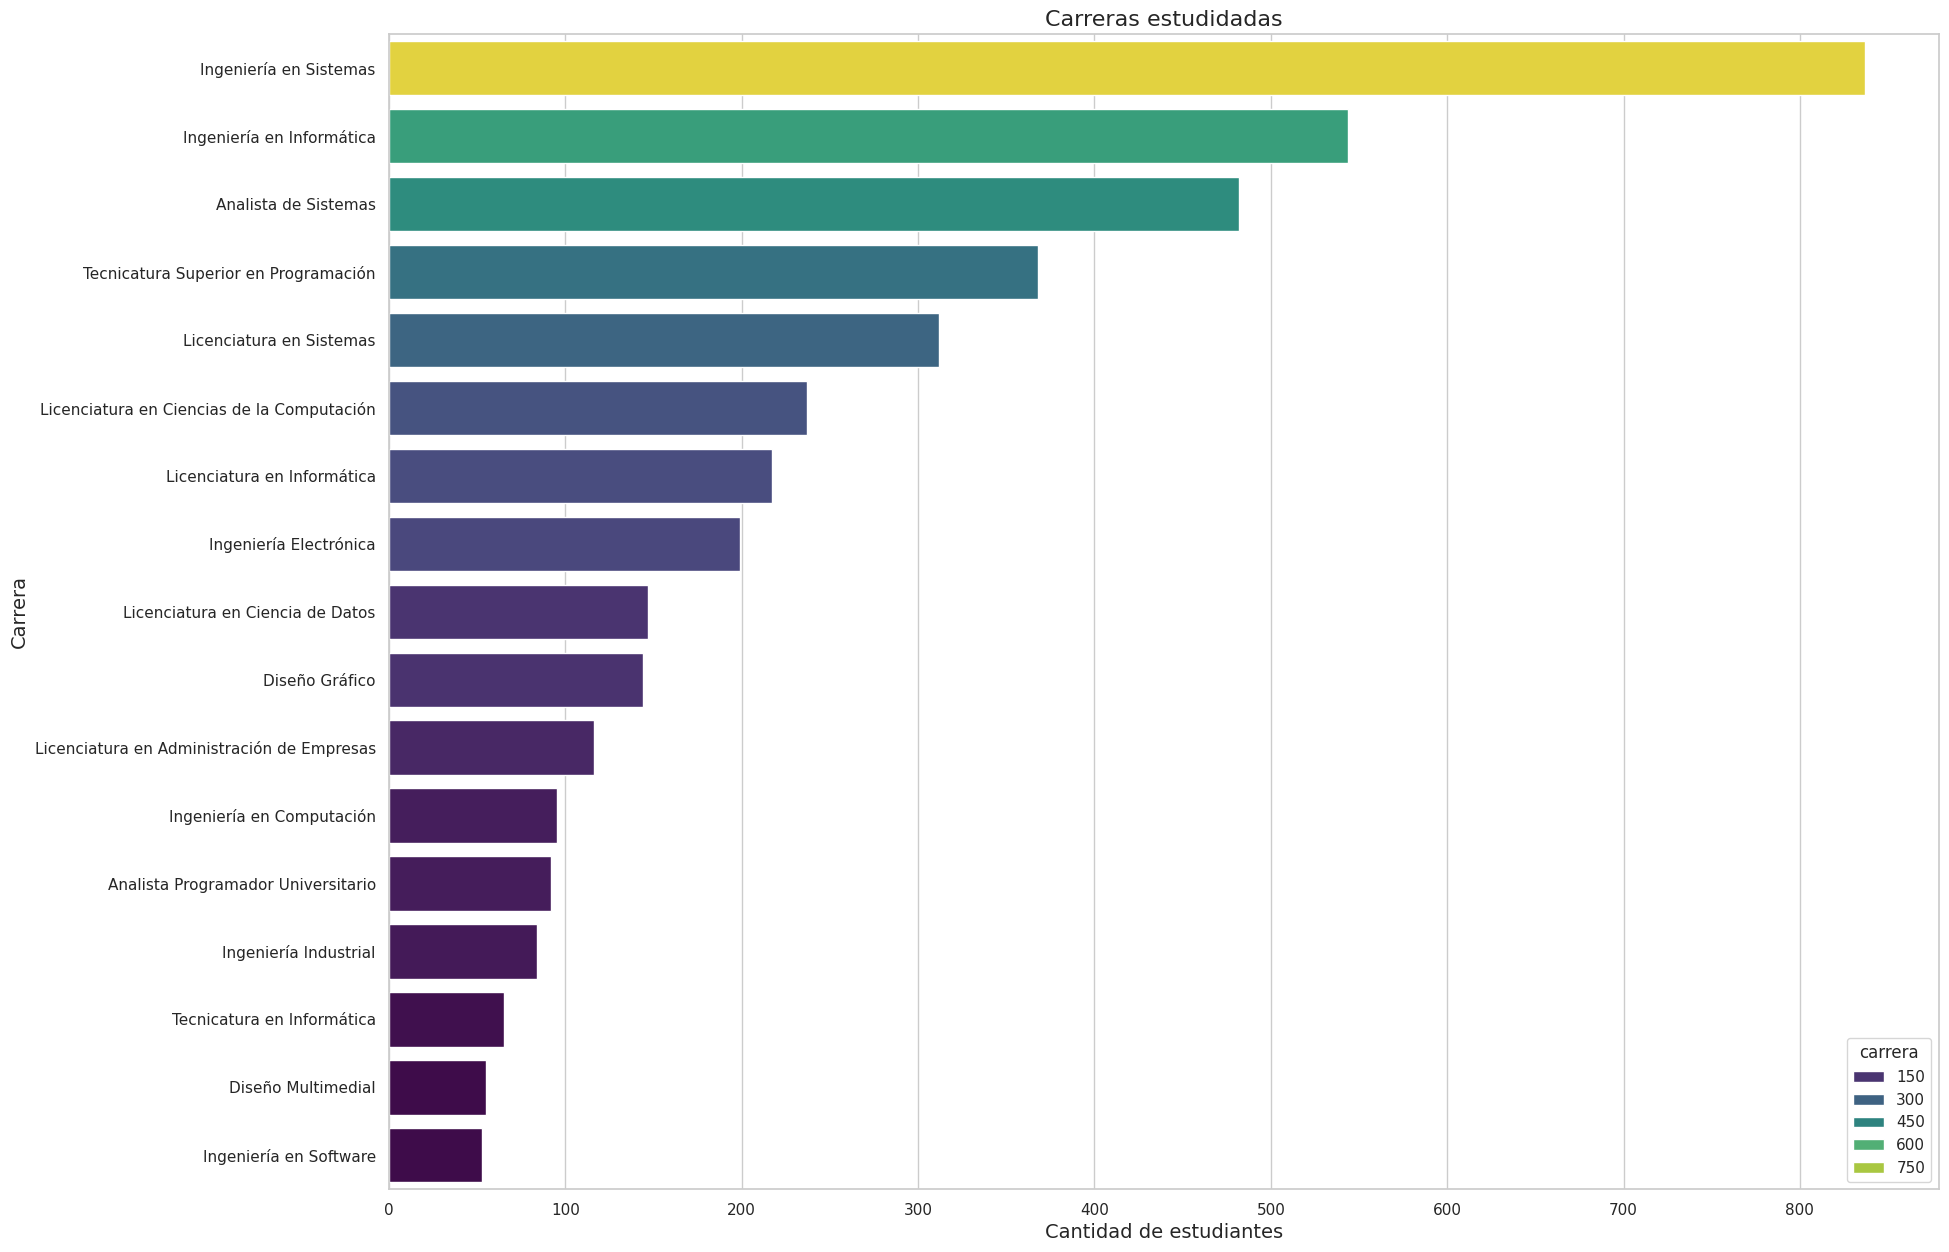

In [ ]:
# Configurar colores y estilo
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=carrera_count.reset_index()
frecuencias_df.columns=['carrera_count','carrera']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='carrera',y='carrera_count',
            palette="viridis", #Esquema de colores
            hue='carrera', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )
# Etiquetas
plt.title("Carreras estudidadas", fontsize=16)
plt.xlabel("Cantidad de estudiantes", fontsize=14)
plt.ylabel("Carrera", fontsize=14)
plt.show()

Como podemos observar, hay una gran concentración de estudiantes de alguna carrera con acercamiento al IT o la tecnología, aunque en espacios más cercanos a la mitad del grafico podemos observar otras que no están relacionadas o no poseen un acercamiento a primera vista de IT.

Como se ha dicho antes, este grafico puede ser manipulado para aumentar o disminuir el umbral pudiendo reducir la cantidad de representantes de algunas carreras menos representadas en los encuestados.

# **Lenguajes de programación o tecnologias que se utilizan**

Siendo que estamos analizando un enfoque especializado de IT, parece lo más logico averiguar que tecnologías y/o lenguajes de programación son los más utilizados.

In [ ]:
lenguaje_count=df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].value_counts()
lenguaje_count

,count
lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual,
Ninguno de los anteriores,873
"Python, SQL",246
SQL,209
Python,178
"Bash/Shell, Python",121
...,...
"COBOL, Ninguno de los anteriores",1
"Python, power fx",1
"Python, R, Scala, SQL, VBA",1


Como en algunos casos que hemos visto, primero llamaremos la columna completa para su revisión y sería lógico/necesario el filtrarlas o no.

 En este caso vemos que si, de nuevo vemos algunas representaciones escazas, aunque también vemos que en la encuesta hay algunas que fueron multiples respuestas.

In [ ]:
#Filtrado de genero que tiene una ocurrencia meo o igual al  umbral
umbral = 50

lenguaje_menos_frecuente = df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].value_counts()[df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].value_counts()<umbral].index
#Filtrado de dataset
df_filtrado_lenguaje = df[~df['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].isin(lenguaje_menos_frecuente)]

Por lo anterior nombrado, procederemos con un filtrado aunque esta vez más amplio que otros que realizamos a lo largo del análisis completo debido a la cantidad de respuestas no concentradas.

In [ ]:
lenguaje_count=df_filtrado_lenguaje['lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual'].value_counts()
lenguaje_count

,count
lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual,
Ninguno de los anteriores,873
"Python, SQL",246
SQL,209
Python,178
"Bash/Shell, Python",121
"CSS, HTML, Javascript, TypeScript",107
Bash/Shell,89
"Javascript, TypeScript",81
Java,80


Haremos una comprobación de los filtrados que aun vemos que son muchos.

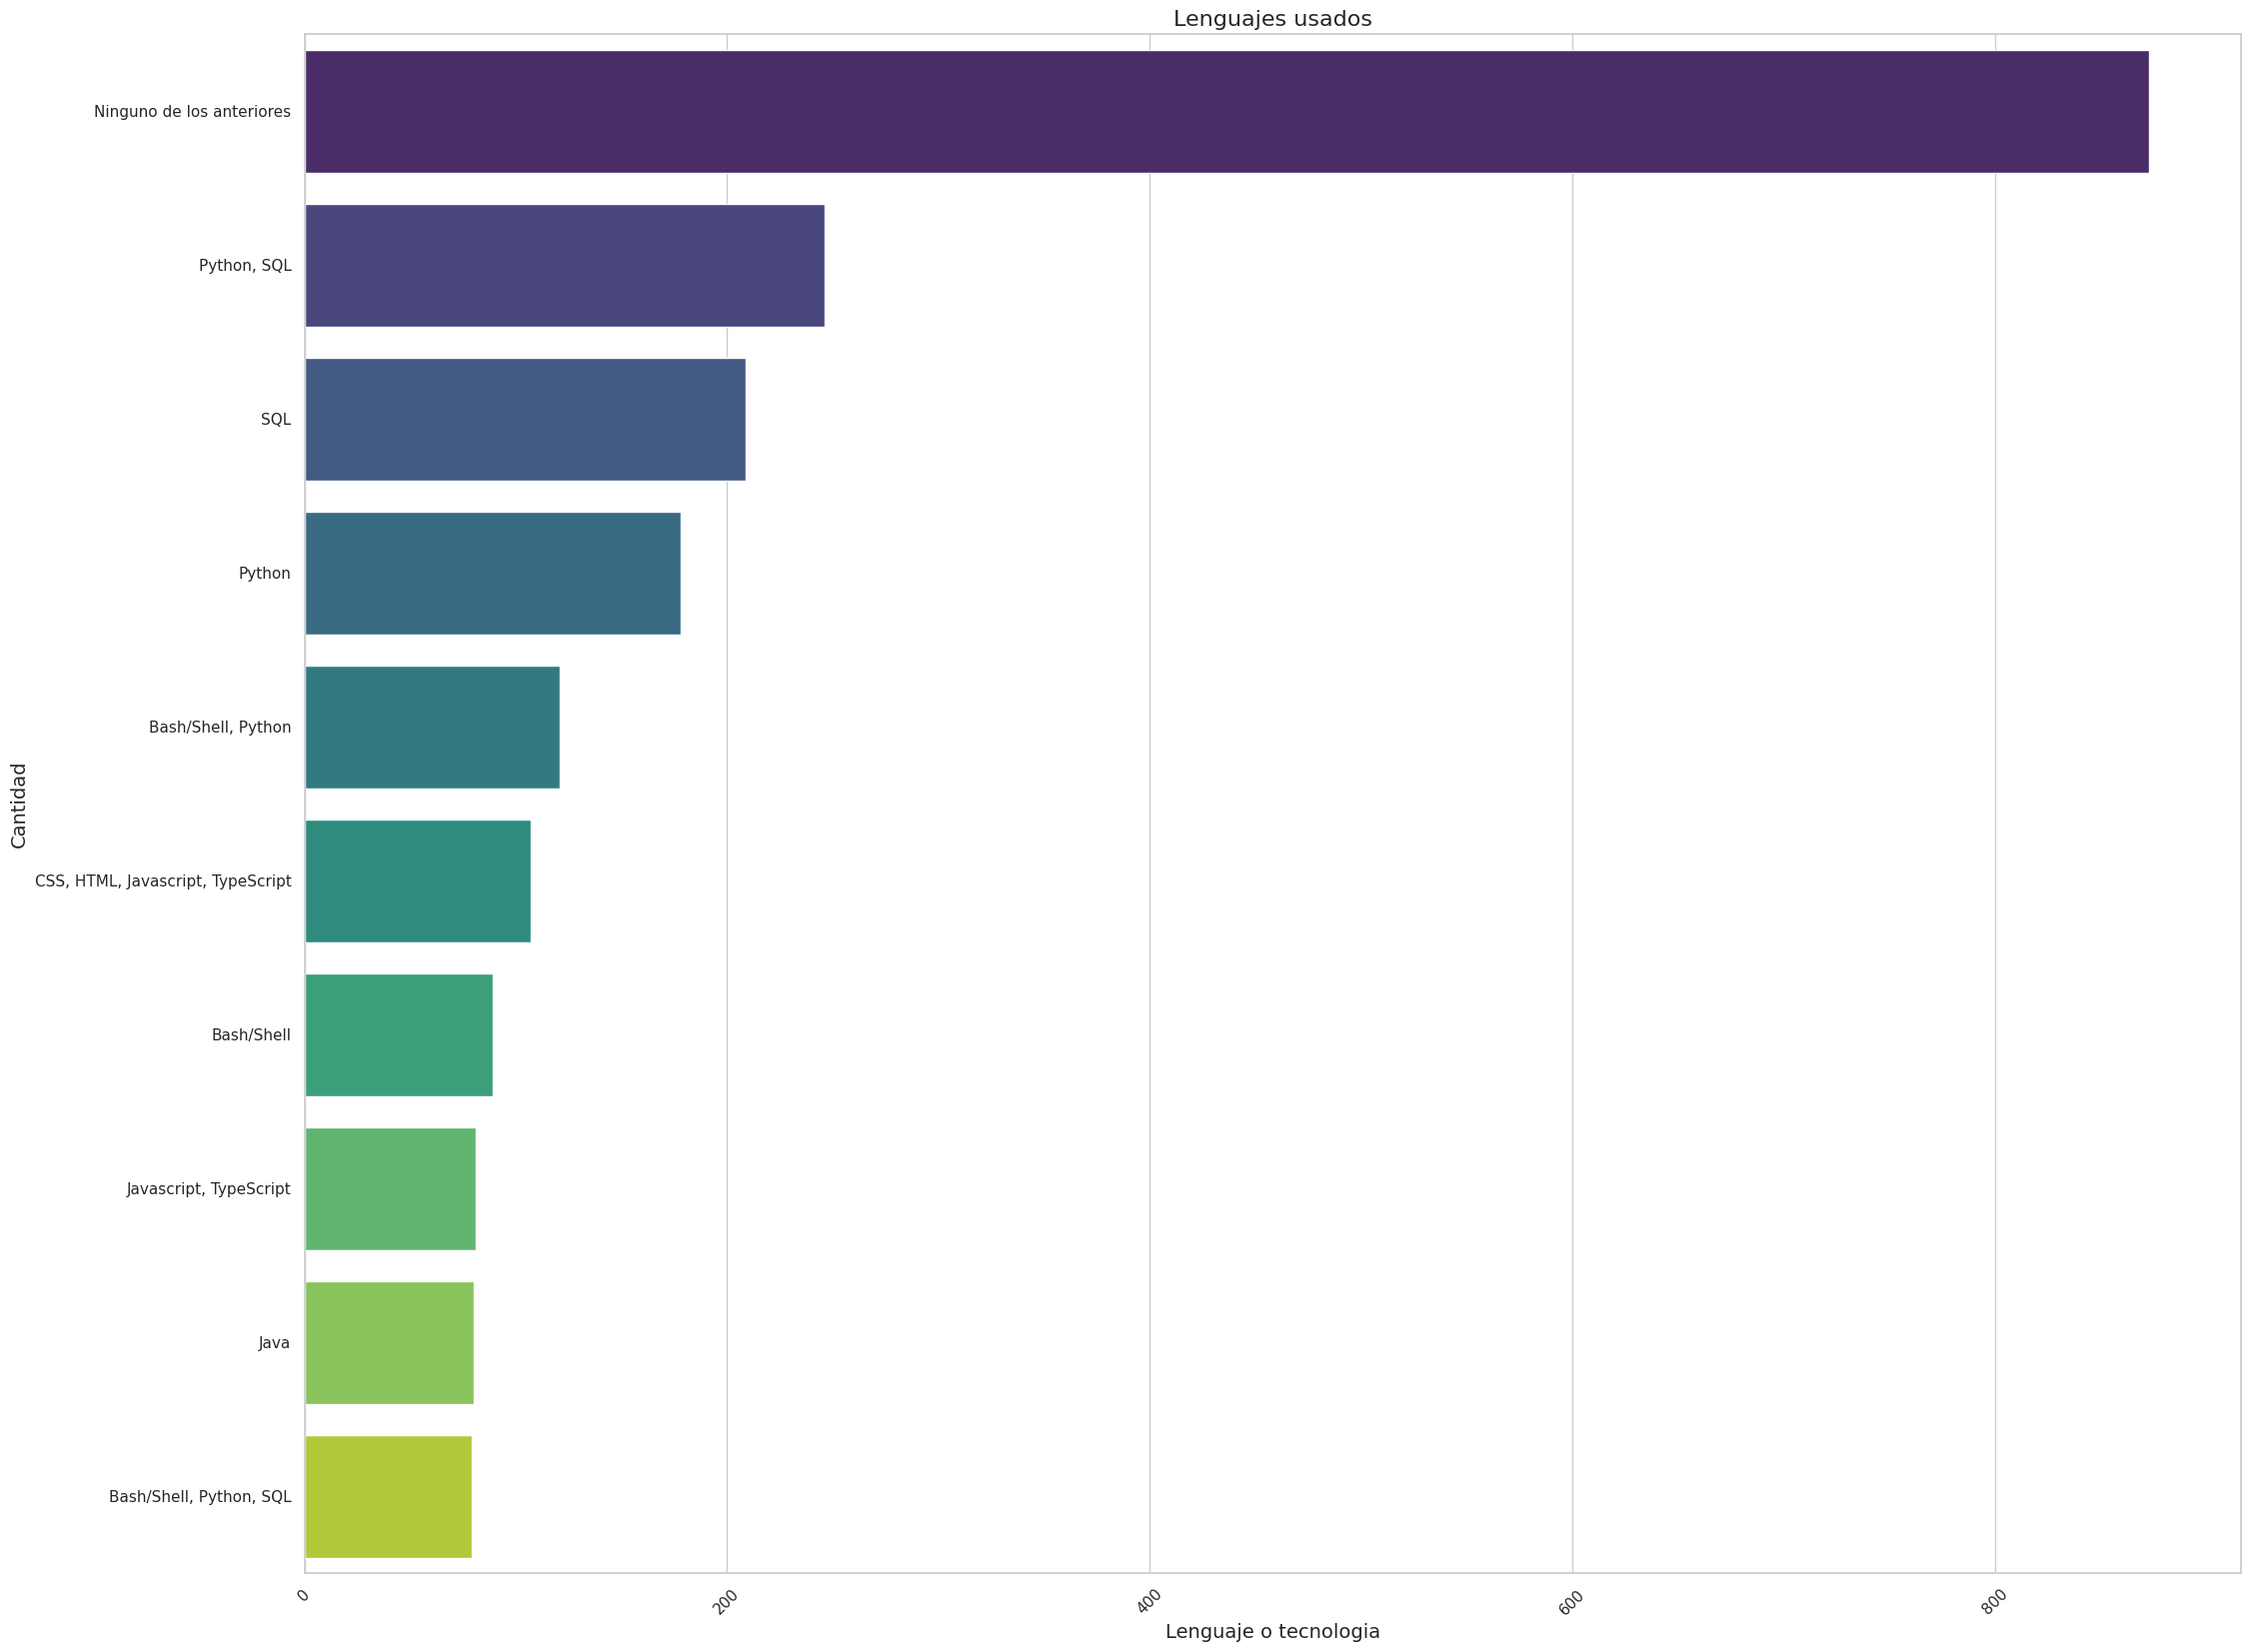

In [ ]:
# Configurar colores y estilo
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=lenguaje_count.reset_index()
frecuencias_df.columns=['lenguaje_count','lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='lenguajes_de_programacion_o_tecnologias_que_utilices_en_tu_puesto_actual',y='lenguaje_count',
            palette="viridis", #Esquema de colores
            hue='lenguaje_count', #Asignar colores por categoria
            )
# Etiquetas
plt.title("Lenguajes usados", fontsize=16)
plt.xlabel("Lenguaje o tecnologia", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.xticks(rotation=45)
plt.show()

Ahora filtradas las tecnologías y/o lenguajes menos usados, podremos ver en el grafico cuáles son los más utilizadas, aunque vemos que hay algunas que no fueron nombradas sea la razón cuál sea.

# uso de herramientas ia en el trabajo

Como ya sabemos es habitual el uso de la IA en la actualidad, por lo cuál es notable que tanto es usada la misma por los encuestados.

In [ ]:
Ia_count=df['que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo'].value_counts()
Ia_count

,count
que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo,
5,1262
3,1262
4,1017
2,727
1,501
0,427


Ya al llamar la columna del uso de la IA u otras herramientas en el trabajo podemos ver un notable uso de bastante uso como un 5 a un sorprendente 3 que puede ser intepretado como un ni mucho ni poco.

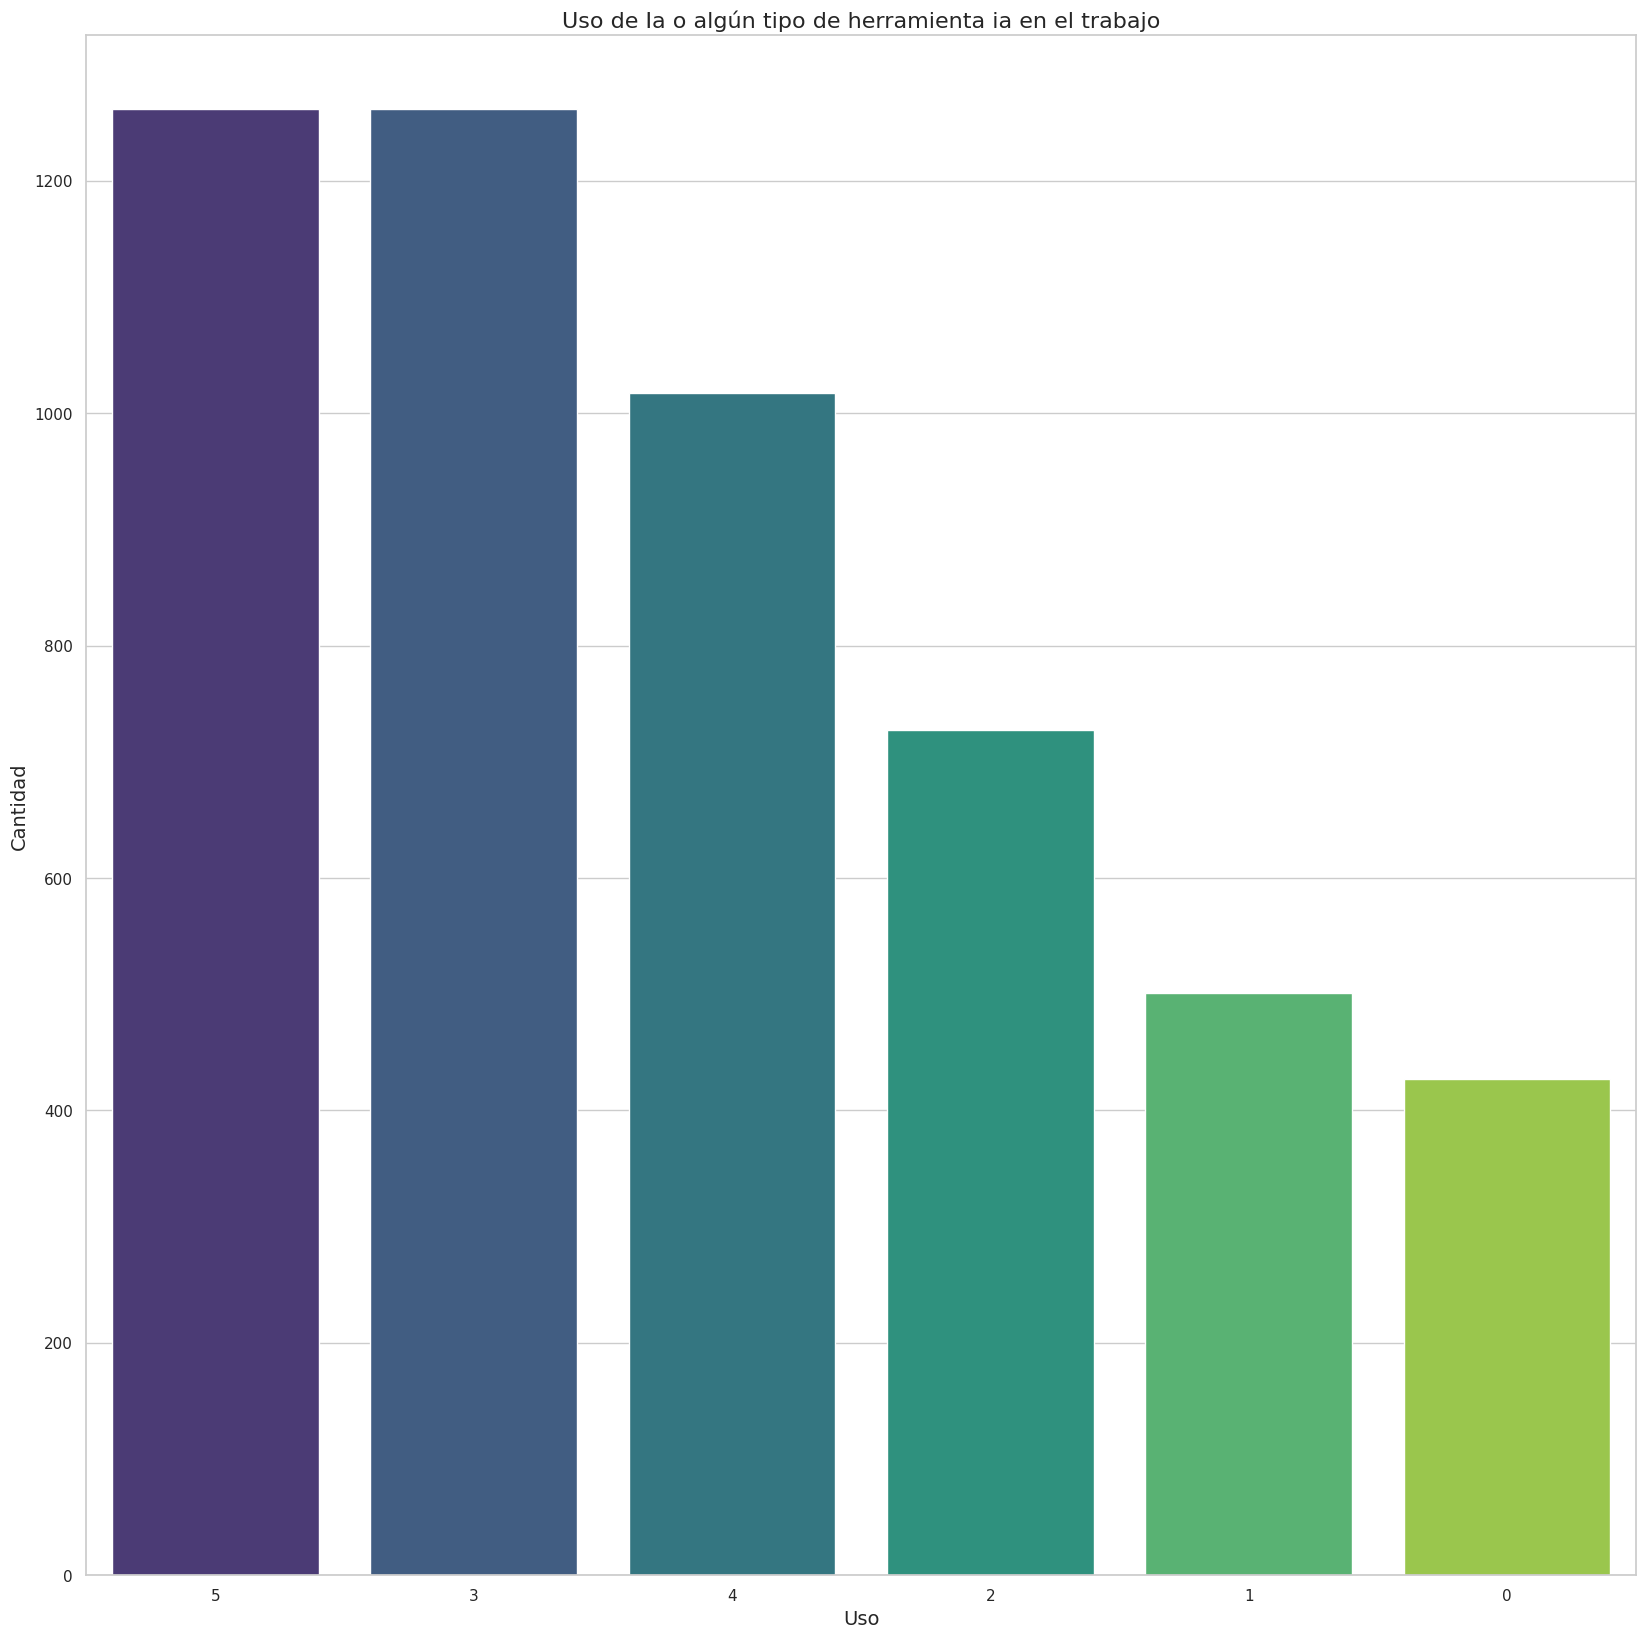

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,20))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=Ia_count.reset_index()
frecuencias_df.columns=['Ia_count','que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='Ia_count',y='que_tanto_estas_usando_copilotchatgpt_u_otras_herramientas_de_ia_para_tu_trabajo',
            palette="viridis", #Esquema de colores
            hue='Ia_count', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )
# Etiquetas
plt.title("Uso de Ia o algún tipo de herramienta ia en el trabajo", fontsize=16)
plt.xlabel("Uso", fontsize=14)
plt.ylabel("Cantidad", fontsize=14)
plt.show()

Una vez realizado el gráfico, podemos notar que es particular el uso de la ia para cada uno e incluso el gran numero entre los que no las usan entre los encuestados; lo cuál en la epoca actual es notable.

# **dedicación part time o full etc**

Uno de las cosas más importantes en el ambito IT es su posible flexibilidad, para algunos por fuera como por dentro del ambito, por lo que analizar si son part time o full es interesante.

In [ ]:
dedicacion_count=df['dedicacion'].value_counts()
dedicacion_count

,count
dedicacion,
Full-Time,4974
Part-Time,222


Como es habitual, primero llamaremos la columna completa, para un posterior análisis, en el que vemos ya una notable diferencia entre ambos casos.

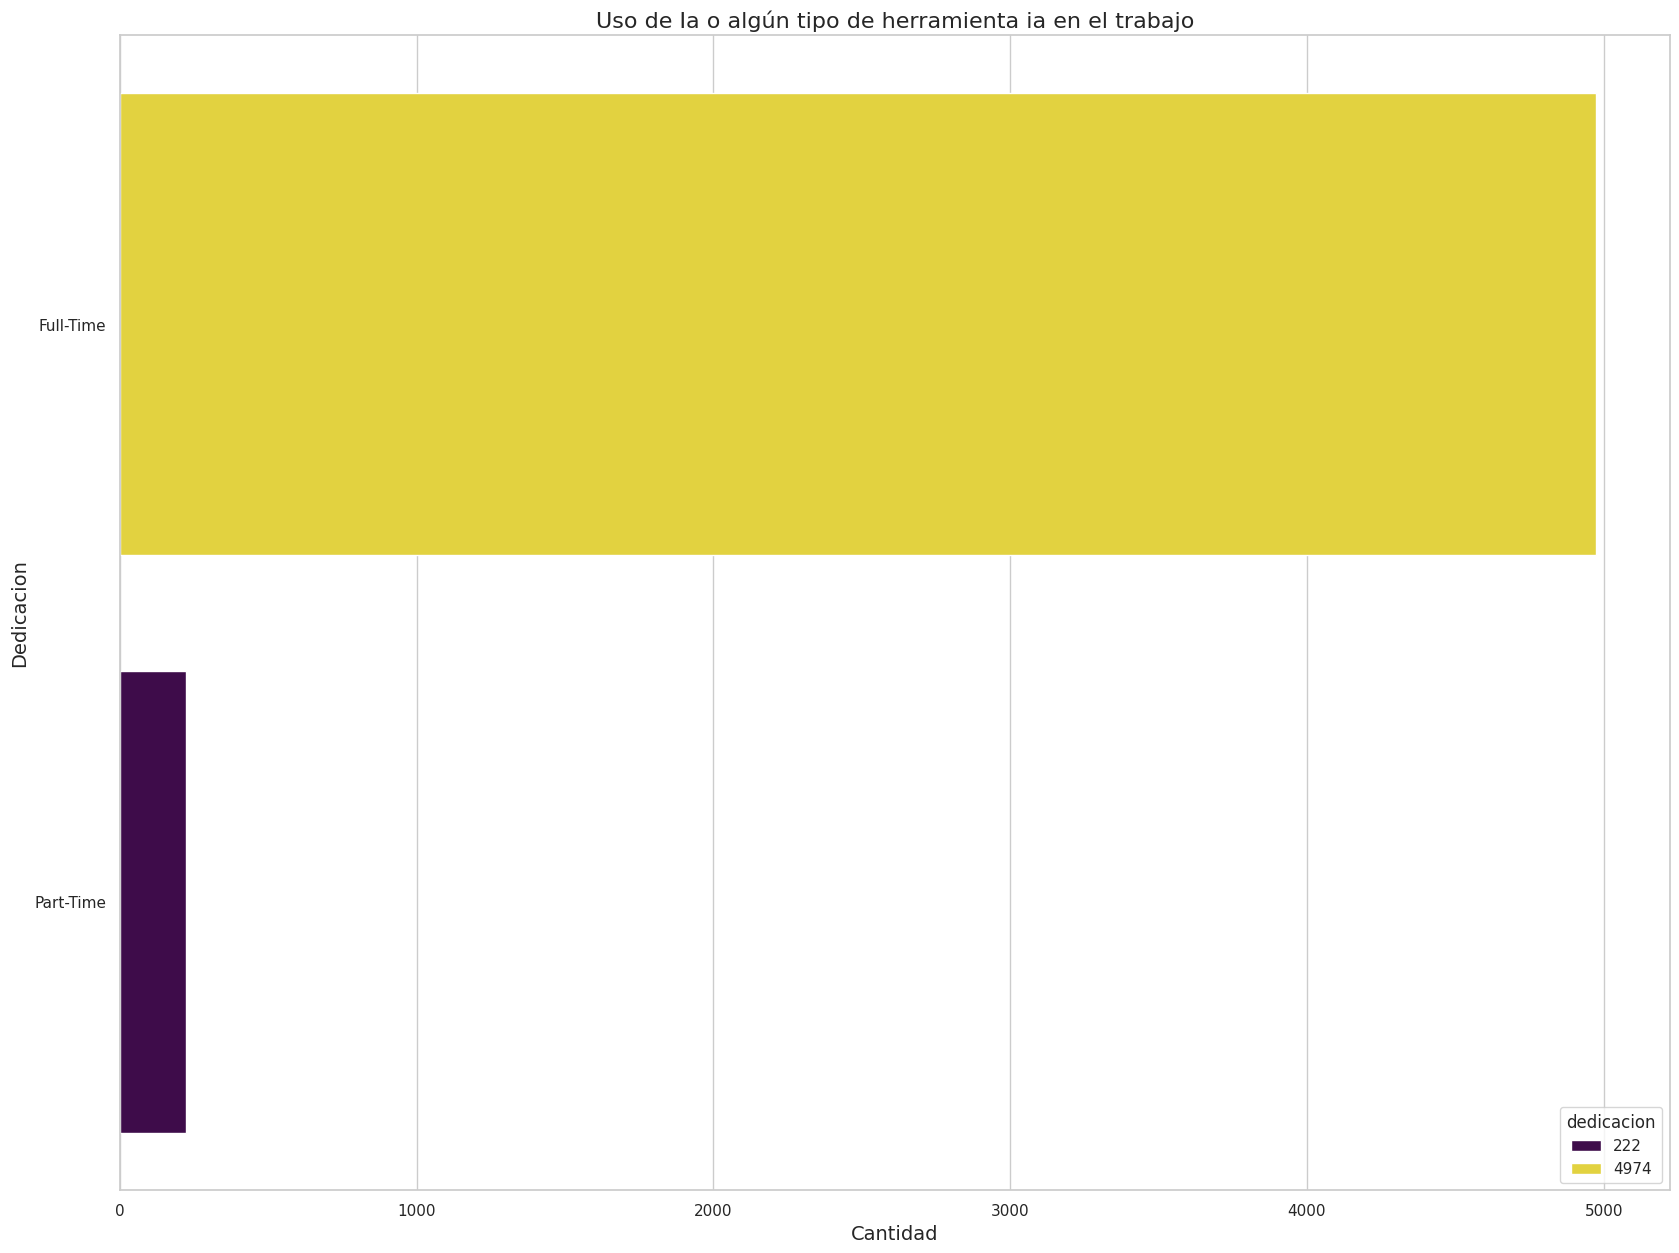

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(20,15))

#Crear un Dataframe con las frecuencias para una mejor visualización
frecuencias_df=dedicacion_count.reset_index()
frecuencias_df.columns=['dedicacion_count','dedicacion']

#Crear el grafico
sns.barplot(data=frecuencias_df, x='dedicacion',y='dedicacion_count',
            palette="viridis", #Esquema de colores
            hue='dedicacion', #Asignar colores por categoria
            dodge=False #Evita separación en caso de hue
            )
# Etiquetas
plt.title("Uso de Ia o algún tipo de herramienta ia en el trabajo", fontsize=16)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Dedicacion", fontsize=14)
plt.show()

Ya en el gráfico podemos ver la marcada diferencia a cuándo invocamos la columna, como la gran mayoria de los encuestados se dedican full time a su trabajo en IT

# **Salario bruto por categoria**

Hecho el previo analisis de la cantidad de cada categoria, podriamos preguntarnos si habria una notable diferencia o no en el sueldo bruo de los encuestados segun corresponda con su categoria.

In [ ]:
salario_count=df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos'].value_counts()
salario_count

,count
ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos,
2000000,134
2500000,133
3000000,121
1500000,119
1800000,105
...,...
3162921,1
1757067.18,1
3175346,1


Ante la gran disparidad de diferentes sueldos, como seria lo esperado, vamos a tener que filtrar algunos para poder hacer un mejor análisis, en este caso procederemos a hacerlo dentro de la misma creación del grafico en lugar de separado.

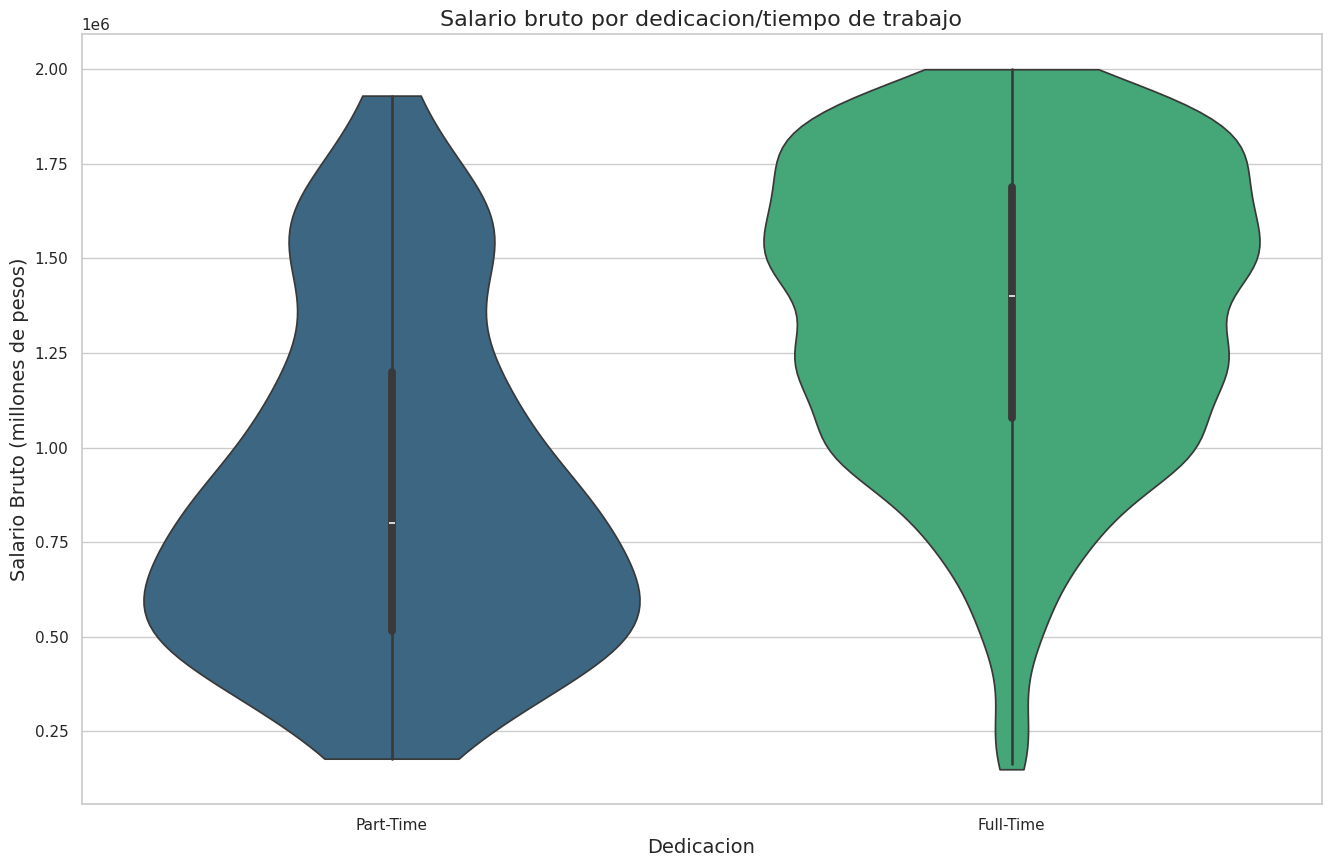

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

# Usar la columna numérica para el filtrado
df_filtrado=df[df['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric']<2000000]

sns.violinplot(x='dedicacion',y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric',data=df_filtrado,
               palette='viridis',
               hue='dedicacion',
               cut=0)

plt.title("Salario bruto por dedicacion/tiempo de trabajo",fontsize=16)
plt.xlabel("Dedicacion",fontsize=14)
plt.ylabel("Salario Bruto (millones de pesos)",fontsize=14)
plt.show()

Como vemos en el gráfico representado el salario bruto en millones, podemos ver que el part time se ve concentrado en una notable baja de salario en contraposición, como bien era esperado el full time goza de mejores sueldos viendo su prominente rango en el gráfico más acercado al limite que dispusimos de 2 millones.

 Vemos que el fulltime comienza a crecer desde 1 millon a 2 millones y el partime, lo vemos más alargado por debajo del millon.

 Todo siendo en un ambito de millones de pesos argentinos.

# **Salario bruto por genero**

Como ya hemos analizado las diferencias de salario por su dedicación o tiempo de trabajo, veremos un análisis con respecto al genero que previamente hemos verificado de los encuestados.

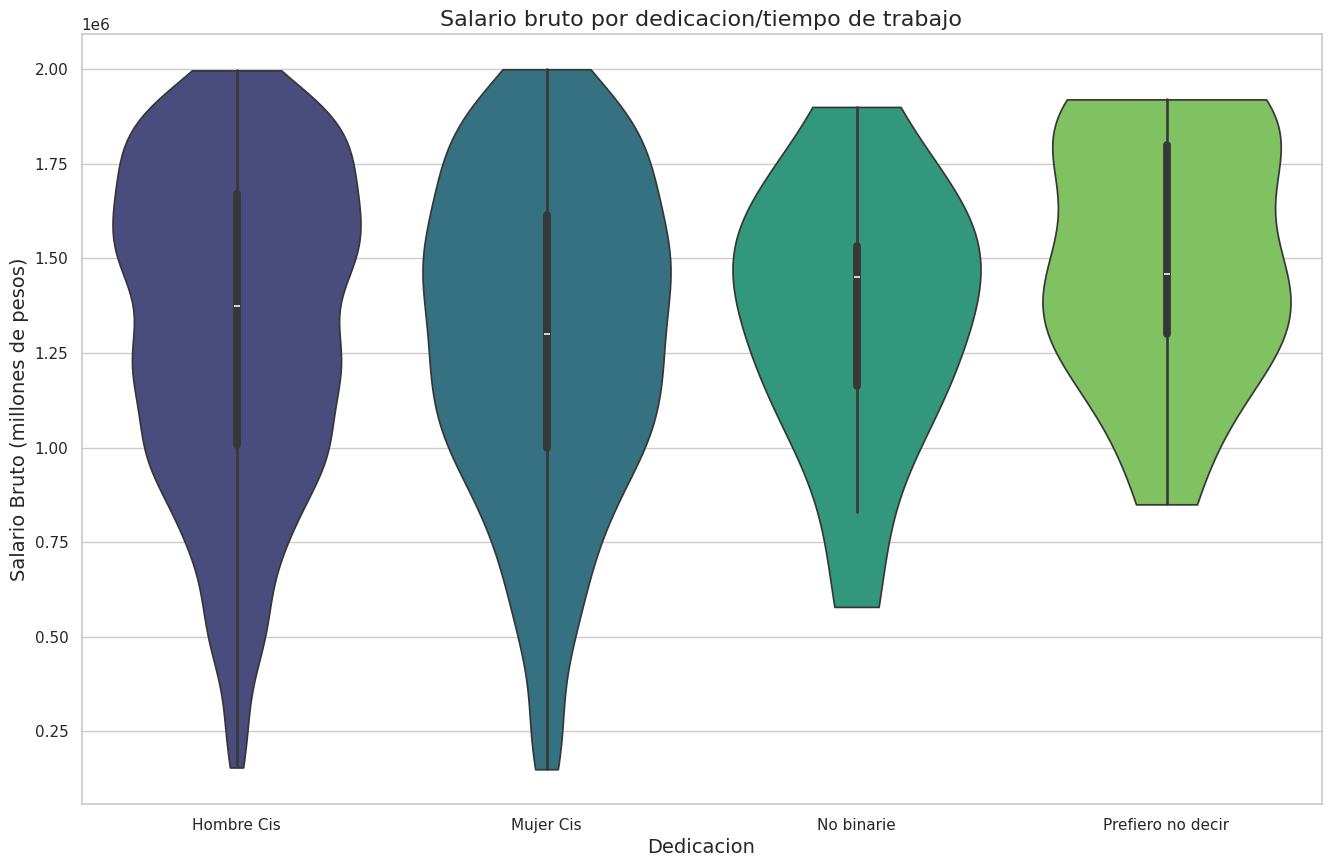

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(16,10))

# Usar la columna numérica para el filtrado
df_filtrado=df_filtrado_genero[df_filtrado_genero['ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric']<2000000]

sns.violinplot(x='genero',y='ultimo_salario_mensual_o_retiro_bruto_en_pesos_argentinos_numeric',data=df_filtrado,
               palette='viridis',
               hue='genero',
               cut=0)

plt.title("Salario bruto por dedicacion/tiempo de trabajo",fontsize=16)
plt.xlabel("Dedicacion",fontsize=14)
plt.ylabel("Salario Bruto (millones de pesos)",fontsize=14)
plt.show()

Como era esperado, habrán una mayor concentración con respecto a la cantidad de representantes que hay de cada genero en los encuestados y eso influira en la concentración de sus salarios para cada uno.

Aun asi es interesante ver como se concentra de mayor o menor medida los sueldos para cada genero representado en los encuestados.